In [2]:
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [3]:
pd.options.display.max_columns = 500

In [4]:
geir_path = "/geir_data/scr/petershi" #should save work here 
sdssv_path = "/yngve_data/sdssv/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/spectra/star" #path for SDSSV spectra
sdssiv_path = "/yngve_data/sdss/apogee/dr17/apogee/spectro/redux/dr17/stars/apo25m"

xmatch_path = "/yngve_data/sdssv/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/aux_xmatch/ipl-1_dr17_lite_230517_byYS.fits"
model_path = "/geir_data/scr/petershi/models/astroNN_APOGEE_VAC/astroNN_0512_run002"

In [5]:
d = open("/geir_data/scr/petershi/serialized/spec_arr.pkl", "rb")
s = open("/geir_data/scr/petershi/serialized/star_info.pkl", "rb")

stars = pickle.load(s)
diffs = pickle.load(d)

In [6]:
valid_apo = [list(i.keys())[0] for i in diffs[0]["Blue"]]
valid_apo

['2M02175107-0421222',
 '2M02181589-0405513',
 '2M02184871-0548470',
 '2M02184871-0548470',
 '2M02212780-0447322',
 '2M02223989-0532510',
 '2M02203142-0611130',
 '2M02203142-0611130',
 '2M02215936-0430385',
 '2M21303125+4435142',
 '2M21304058+4438335',
 '2M21333470+4532034',
 '2M21344235+4535514',
 '2M21253218+4513078',
 '2M21273481+4519004',
 '2M21270005+4517529',
 '2M21220829+4533508',
 '2M21273482+4557570',
 '2M21265892+4609131',
 '2M21321427+4555318',
 '2M21283396+4611358',
 '2M21311455+4620002',
 '2M21302993+4632089',
 '2M20270421+3858012',
 '2M20245716+3911071',
 '2M20265893+3910235',
 '2M20312634+3956196',
 '2M20312634+3956196',
 '2M20312805+4003405',
 '2M20292357+4005564',
 '2M20250670+3928220',
 '2M20224362+3947275',
 '2M20220878+3958160',
 '2M20220878+3958160',
 '2M20215160+3959496',
 '2M20215160+3959496',
 '2M20233539+3956383',
 '2M20233539+3956383',
 '2M20243892+4002353',
 '2M20335710+4006240',
 '2M20330763+4017441',
 '2M20315166+4021285',
 '2M20320941+4022514',
 '2M2033453

In [7]:
valid_cat = [list(i.keys())[1] for i in diffs[0]["Blue"]]

In [8]:
len(valid_apo)

26714

In [9]:
e = open("/geir_data/scr/petershi/serialized/SDSS-IV elementals.pkl", "rb")
#s = open("/geir_data/scr/petershi/serialized/spec_arr.pkl", "rb")

elems = pickle.load(e)
elems

{'2M02222833-0609582': {'Points': {'teff': 6174.623,
   'logg': 3.8659608,
   'Fe': 0.12513,
   'C': 0.11715299,
   'CI': 0.119972095,
   'N': 0.110195994,
   'O': 0.13452357,
   'Na': 0.0812335,
   'Mg': 0.04775849,
   'Al': 0.286916,
   'Si': 0.24246599,
   'P': nan,
   'S': 0.121136494,
   'K': 0.1320709,
   'Ca': 0.06314069,
   'Ti': -0.26493102,
   'TiII': -0.53117806,
   'V': 0.08817055,
   'Cr': -0.15326391,
   'Mn': 0.17358251,
   'Co': 0.677514,
   'Ni': 0.092515,
   'Cu': nan,
   'Ge': nan,
   'Rb': nan,
   'Ce': 0.1287231,
   'Nd': nan,
   'Yb': nan,
   'C13': nan},
  'Errors': {'teff': 34.447742,
   'logg': 0.019264188,
   'Fe': 0.00440508,
   'C': 0.040723193,
   'CI': 0.029286405,
   'N': 0.1146894,
   'O': 0.093840756,
   'Na': 0.12923124,
   'Mg': 0.010720406,
   'Al': 0.012161969,
   'Si': 0.0115177585,
   'P': 0.109039776,
   'S': 0.036926992,
   'K': 0.03782505,
   'Ca': 0.010063248,
   'Ti': 0.078032084,
   'TiII': 0.38422897,
   'V': 0.13296723,
   'Cr': 0.05510973

In [10]:
p = []
e = []

iv_snr = []
v_snr = []

for a, c in zip(valid_apo, valid_cat):
    info = elems[a]
    p.append(info["Points"])
    e.append(info["Errors"])

    ivs = stars["SDSS-IV"][a]["SNR"]
    vs = stars["SDSS-V"][c]["SNR"][0][0]

    iv_snr.append(ivs)
    v_snr.append(vs)

In [11]:
np.corrcoef(iv_snr, v_snr)

array([[1.        , 0.50969653],
       [0.50969653, 1.        ]])

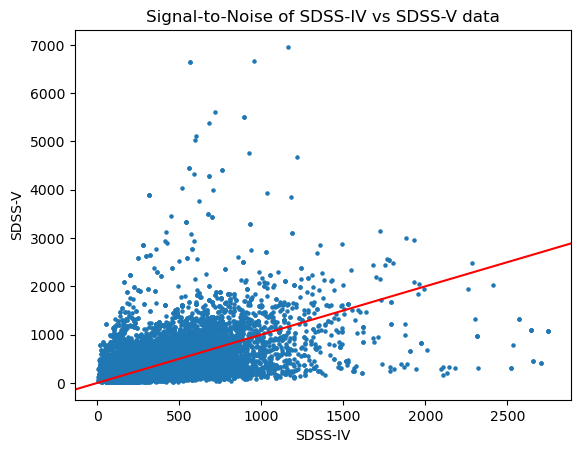

In [12]:
plt.scatter(iv_snr, v_snr, s = 5)
plt.title("Signal-to-Noise of SDSS-IV vs SDSS-V data")
plt.xlabel("SDSS-IV")
plt.ylabel("SDSS-V")
plt.axline((0, 0), slope=1, c = "red")
plt.show()

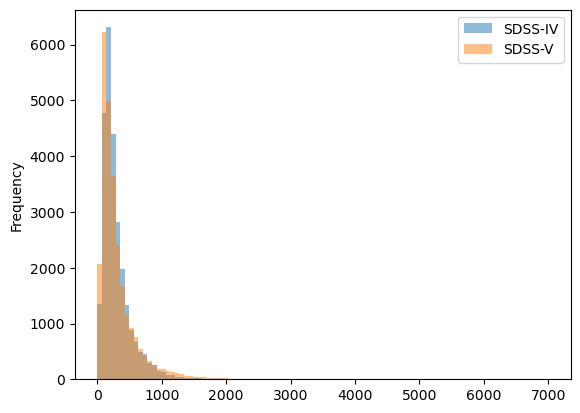

In [13]:
bins = np.linspace(0, 7000, 100)
plt.hist(iv_snr, bins = bins, label = "SDSS-IV", alpha = 0.5)
plt.hist(v_snr, bins = bins, label = "SDSS-V", alpha = 0.5)
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [14]:
points = pd.DataFrame(p)
errors = pd.DataFrame(e)

In [15]:
points

teff      logg       Fe         C        CI         N  \
0       6276.733398  4.114545 -0.14979 -0.132203 -0.116684 -0.041340   
1               NaN       NaN -0.51320 -0.645440 -0.694470  0.361360   
2       6120.736328  4.185034 -0.16747 -0.172771 -0.163914  0.054030   
3       6120.736328  4.185034 -0.16747 -0.172771 -0.163914  0.054030   
4       6785.443359  3.994033 -0.74362 -0.700940 -0.783729 -0.707768   
...             ...       ...      ...       ...       ...       ...   
26709  18237.105469  4.386278      NaN       NaN       NaN       NaN   
26710  17569.156250  3.723001      NaN       NaN       NaN       NaN   
26711   4837.166504  2.480554 -0.19687 -0.294440 -0.297500  0.029860   
26712  10211.349609  3.853112      NaN       NaN       NaN       NaN   
26713  19544.001953  4.225697      NaN       NaN       NaN       NaN   

              O        Na        Mg        Al        Si   P         S  \
0     -0.069146 -1.080736 -0.181841 -0.018789 -0.059931 NaN -0.139156   
1     -0.649547  0.025184 -1.079331 -0.770194 -0.776787 NaN -0.453367   
2     -0.061550 -0.512796 -0.174320 -0.087874 -0.077950 NaN -0.185398   
3     -0.061550 -0.512796 -0.174320 -0.087874 -0.077950 NaN -0.185398   
4     -0.838583 -2.420537 -1.154732 -1.278574 -0.799345 NaN -0.552217   
...         ...       ...       ...       ...       ...  ..       ...   
26709       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26710       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26711 -0.069686 -0.255348 -0.085870 -0.066458 -0.144886 NaN -0.037848   
26712       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26713       NaN       NaN       NaN       NaN       NaN NaN       NaN   

              K        Ca        Ti      TiII         V        Cr        Mn  \
0     -0.099577 -0.139741 -0.034361 -0.723598 -0.190449 -0.458212 -0.225917   
1     -0.364747 -0.602854 -1.326641 -1.189578 -0.413099  0.217428 -0.407647   
2     -0.316047 -0.175121 -0.490611 -0.447808 -0.274349 -0.165603 -0.177157   
3     -0.316047 -0.175121 -0.490611 -0.447808 -0.274349 -0.165603 -0.177157   
4     -2.376777 -0.088574 -0.896029 -0.968398 -1.367169 -0.380142 -0.356357   
...         ...       ...       ...       ...       ...       ...       ...   
26709       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26710       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26711 -0.043801 -0.166667 -0.178145 -0.047011 -0.097588 -0.228896 -0.222788   
26712       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26713       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             Co        Ni  Cu  Ge  Rb        Ce  Nd  Yb  C13  
0      0.146126 -0.205100 NaN NaN NaN  0.129093 NaN NaN  NaN  
1     -0.874846 -0.561930 NaN NaN NaN  0.290883 NaN NaN  NaN  
2      0.532814 -0.153630 NaN NaN NaN -0.462517 NaN NaN  NaN  
3      0.532814 -0.153630 NaN NaN NaN -0.462517 NaN NaN  NaN  
4      0.828894 -0.914560 NaN NaN NaN -1.834407 NaN NaN  NaN  
...         ...       ...  ..  ..  ..       ...  ..  ..  ...  
26709       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  
26710       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  
26711 -0.106050 -0.173827 NaN NaN NaN -0.172170 NaN NaN  NaN  
26712       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  
26713       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  

[26714 rows x 29 columns]

In [16]:
errors

teff      logg        Fe         C        CI         N         O  \
0       43.893612  0.024850  0.005641  0.060814  0.037035  0.261368  0.139877   
1             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       39.149849  0.024590  0.005881  0.053179  0.036028  0.102301  0.110897   
3       39.149849  0.024590  0.005881  0.053179  0.036028  0.102301  0.110897   
4       95.535721  0.046800  0.011568  0.202383  0.071076  4.453027  0.542881   
...           ...       ...       ...       ...       ...       ...       ...   
26709  220.483566  0.046780  0.128759  0.408697  0.076166  0.044268  1.962248   
26710  303.751190  0.092628  0.302695  0.951028  0.164085  0.101313  4.921238   
26711    8.806530  0.023532  0.007292  0.013681  0.024008  0.016768  0.018463   
26712  221.141388  0.063028  0.046562  0.607819  0.099038  0.067609  2.737322   
26713  267.811493  0.063028  0.168784  0.607819  0.099038  0.067609  2.737322   

             Na        Mg        Al        Si         P         S         K  \
0      0.209176  0.012404  0.013347  0.013212  0.146991  0.044982  0.047384   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      0.191815  0.012523  0.013713  0.013163  0.132970  0.045835  0.044442   
3      0.191815  0.012523  0.013713  0.013163  0.132970  0.045835  0.044442   
4      0.774812  0.030285  0.015969  0.026820  0.358005  0.072811  0.090968   
...         ...       ...       ...       ...       ...       ...       ...   
26709  1.151888  0.014630  0.075935  0.017405  0.603791  0.059496  0.125993   
26710  3.016194  0.025852  0.156502  0.035145  1.447638  0.126260  0.254144   
26711  0.063930  0.011379  0.018727  0.013517  0.134938  0.035230  0.036584   
26712  1.941870  0.017064  0.033032  0.019937  0.810872  0.076160  0.227649   
26713  1.941870  0.017064  0.058899  0.019937  0.810872  0.076160  0.190832   

             Ca        Ti      TiII         V        Cr        Mn        Co  \
0      0.013203  0.106395  0.469233  0.184860  0.081446  0.013484  0.286556   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      0.013170  0.093660  0.403987  0.162656  0.075852  0.013965  0.269761   
3      0.013170  0.093660  0.403987  0.162656  0.075852  0.013965  0.269761   
4      0.032066  0.279637  0.978225  0.508186  0.235930  0.031966  0.473012   
...         ...       ...       ...       ...       ...       ...       ...   
26709  0.024168  0.553069  2.269055  1.003058  0.327136  0.023618  0.650416   
26710  0.061470  1.139216  3.777327  2.650120  0.854688  0.296346  1.098752   
26711  0.013759  0.020661  0.079878  0.080754  0.038999  0.014546  0.055554   
26712  0.033434  0.740187  2.625174  1.373768  0.499417  0.235794  0.763477   
26713  0.033434  0.740187  2.625174  1.373768  0.499417  0.209924  0.763477   

             Ni        Cu   Ge   Rb        Ce        Nd   Yb       C13  
0      0.011671  0.094630  1.0  1.0  0.261065  0.113734  1.0  0.269334  
1           NaN       NaN  NaN  NaN       NaN       NaN  NaN       NaN  
2      0.011959  0.094245  1.0  1.0  0.227672  0.105855  1.0  0.237781  
3      0.011959  0.094245  1.0  1.0  0.227672  0.105855  1.0  0.237781  
4      0.022412  0.431691  1.0  1.0  0.802044  0.296914  1.0  0.528602  
...         ...       ...  ...  ...       ...       ...  ...       ...  
26709  0.020630  0.378976  1.0  1.0  1.652843  0.417743  1.0  1.057919  
26710  0.163527  1.042774  1.0  1.0  4.593436  1.121574  1.0  1.595920  
26711  0.011654  0.003924  1.0  1.0  0.070390  0.086560  1.0  0.069939  
26712  0.045526  0.798686  1.0  1.0  2.360987  0.605161  1.0  1.232288  
26713  0.189040  0.798686  1.0  1.0  2.360987  0.605161  1.0  1.232288  

[26714 rows x 29 columns]

In [17]:
cpoint = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V point predictions - retrain.csv"))
cerr = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V errors - retrain.csv"))

apoint = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-IV point predictions - retrain.csv"))
aerr = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-IV errors - retrain.csv"))


In [18]:
nans = pd.read_csv("/geir_data/scr/petershi/serialized/nans 2.csv")
snrs = pd.read_csv("/geir_data/scr/petershi/serialized/snrs.csv")

In [19]:
nans

SDSSIV nans  SDSSV nans
0                2        3181
1                0        3484
2               51        3693
3               51        3693
4               65        5385
...            ...         ...
26145          138         447
26146          350        1501
26147           46         212
26148           25         233
26149            0         246

[26150 rows x 2 columns]

In [20]:
snrs["SDSSV SNR"] = snrs["SDSSV SNR"].apply(lambda x : float(x.strip("[]")))
snrs

SDSSIV SNR   SDSSV SNR
0       984.603735  2290.58080
1      1030.757507  1388.76590
2       507.362956   468.65704
3       507.362956   468.65704
4       483.523932  1483.80880
...            ...         ...
26145   245.274155   257.43677
26146    71.098892   138.51350
26147   314.343824   519.83440
26148   245.087187   451.74690
26149   471.297492    98.73619

[26150 rows x 2 columns]

In [21]:
c = pd.concat(
    [cpoint, 
     cerr.rename(mapper = (lambda x : x + "_err"), axis = 1),
     nans["SDSSV nans"],
     snrs["SDSSV SNR"]
    ], axis = 1)

a = pd.concat(
    [apoint, 
     aerr.rename(mapper = (lambda x : x + "_err"), axis = 1),
     nans["SDSSIV nans"],
     snrs["SDSSIV SNR"]
    ], axis = 1)

r = pd.concat(
    [points, 
    errors.rename(mapper = (lambda x : x + "_err"), axis = 1)
    ], axis = 1)

In [22]:
mask = (c["logg_err"] < 0.2) | (a["logg_err"] < 0.2)

In [23]:
a["Mg/Fe"] = a["Mg"] - a["Fe"]
c["Mg/Fe"] = c["Mg"] - c["Fe"]
r["Mg/Fe"] = r["Mg"] - r["Fe"]

In [24]:
comb = pd.concat(
                [a.rename(mapper = (lambda x : x + "_IV"), axis = 1), 
                 c.rename(mapper = (lambda x : x + "_V"), axis = 1)
                ], axis = 1)


In [25]:
comb

teff_IV   logg_IV      C_IV     CI_IV      N_IV      O_IV     Na_IV  \
0      6274.2734  4.142751 -0.127802 -0.134573  0.082363 -0.026600 -0.358486   
1      6092.9880  4.227060 -0.515370 -0.413748  0.548667 -0.228947 -0.293759   
2      6098.5347  4.202386 -0.183924 -0.165166  0.046593 -0.081433 -0.384829   
3      6090.2080  4.199009 -0.186383 -0.168365  0.051578 -0.080505 -0.372406   
4      6661.8906  3.949225 -0.932681 -0.851537  0.109101 -0.378138 -0.297037   
...          ...       ...       ...       ...       ...       ...       ...   
26145  5531.1260  3.510751 -1.634697 -1.541503 -0.985749 -1.119409 -1.149760   
26146  6075.6714  3.296635 -1.633336 -1.585056 -0.844044 -0.946995 -0.825386   
26147  4858.2780  2.530546 -0.263292 -0.293912 -0.020227 -0.119838 -0.198294   
26148  6533.4090  3.267161 -1.325188 -1.411102 -0.059260 -0.784919 -0.403662   
26149  5995.2026  3.677433 -1.437709 -1.441792 -0.754541 -0.922905 -1.078639   

          Mg_IV     Al_IV     Si_IV      P_IV      S_IV      K_IV     Ca_IV  \
0     -0.156413 -0.055591 -0.040095 -0.158921 -0.143351 -0.138864 -0.144228   
1     -0.409205 -0.323556 -0.239052 -0.383472 -0.348086 -0.371937 -0.389876   
2     -0.183039 -0.058514 -0.074633 -0.203860 -0.189851 -0.162841 -0.145079   
3     -0.184096 -0.065340 -0.075109 -0.204244 -0.190755 -0.159249 -0.146954   
4     -0.698317 -0.638260 -0.385171 -0.572831 -0.595510 -0.597437 -0.602092   
...         ...       ...       ...       ...       ...       ...       ...   
26145 -1.391176 -1.625185 -1.184964 -1.457100 -1.089433 -1.274046 -1.370537   
26146 -1.266390 -1.267559 -0.984375 -1.249602 -0.965129 -1.102868 -1.210117   
26147 -0.120203 -0.108305 -0.145919 -0.266906 -0.027593 -0.119116 -0.156666   
26148 -0.982270 -1.034582 -0.685225 -0.944936 -0.906685 -0.787525 -0.858807   
26149 -1.202557 -1.289700 -0.942540 -1.193584 -0.953413 -1.011077 -1.112931   

          Ti_IV   TiII_IV      V_IV     Cr_IV     Mn_IV     Fe_IV     Co_IV  \
0     -0.321229 -0.269884 -0.186103 -0.399343 -0.207037 -0.141723 -0.012116   
1     -0.863734 -0.367437 -0.410195 -0.454919 -0.335007 -0.355835 -0.229068   
2     -0.526711 -0.267942 -0.263917 -0.342514 -0.200709 -0.171270 -0.101070   
3     -0.571103 -0.268424 -0.264759 -0.354366 -0.209402 -0.174079 -0.111028   
4     -0.854701 -0.736874 -0.622142 -0.737850 -0.537142 -0.560136 -0.327914   
...         ...       ...       ...       ...       ...       ...       ...   
26145 -1.981581 -1.347249 -1.487144 -1.642144 -1.769233 -1.478103 -1.389885   
26146 -1.675784 -1.276215 -1.255622 -1.369658 -1.377873 -1.214792 -0.947838   
26147 -0.193561 -0.053997 -0.201717 -0.258132 -0.230412 -0.208022 -0.152671   
26148 -0.994294 -1.076739 -0.936658 -0.979217 -0.840147 -0.837243 -0.557607   
26149 -1.511585 -1.201034 -1.234913 -1.417963 -1.440078 -1.206702 -0.922931   

          Ni_IV  teff_err_IV  logg_err_IV  C_err_IV  CI_err_IV  N_err_IV  \
0     -0.160483   122.637772     0.112015  0.025834   0.047705  0.228296   
1     -0.407110   262.239052     0.252391  0.169163   0.161641  0.792615   
2     -0.174165   107.178870     0.101569  0.020844   0.040514  0.189302   
3     -0.174239   103.494822     0.100818  0.020917   0.042841  0.191744   
4     -0.655782   377.596203     0.320523  0.314898   0.545705  1.376319   
...         ...          ...          ...       ...        ...       ...   
26145 -1.499650   482.458211     0.747257  0.439176   0.658499  0.925047   
26146 -1.287089   484.756084     0.731926  0.566948   1.214125  1.174047   
26147 -0.185072    34.310890     0.075062  0.020850   0.030421  0.022123   
26148 -1.004432   502.552340     0.621623  0.666194   2.225144  2.311596   
26149 -1.265450   440.199137     0.564947  0.410649   0.807577  0.990467   

       O_err_IV  Na_err_IV  Mg_err_IV  Al_err_IV  Si_err_IV  P_err_IV  \
0      0.071728   0.817510   0.054018   0.109358   0.054125  0.059341   
1      0.220867   0.932756   0.177596   0.299362   0.178813  0.151562   
2      0.062018   

In [26]:
diff = a - c 

In [27]:
comb2 = pd.concat(
                [comb, 
                 diff.rename(mapper = (lambda x : x + "_diff"), axis = 1)
                ], axis = 1)

In [28]:
comb3 = comb2[mask]

In [29]:
comb2["teff_IV"].mean()

4996.643731931166

In [30]:
comb2["teff_V"].mean()

5016.046474806883

In [31]:
comb2["logg_IV"].mean()

3.1174976027614725

In [32]:
comb2["logg_V"].mean()

3.180932159082109

In [33]:
comb2["Fe_IV"].mean()

-0.23447629491860053

In [34]:
comb2["Fe_V"].mean()

-0.30447864130390456

In [35]:
comb2["teff_diff"].mean()

-19.402742875717014

In [36]:
comb3["teff_diff"].mean()

-22.00609225213675

In [37]:
comb2["logg_diff"].mean()

-0.06343455632063671

In [38]:
comb3["logg_diff"].mean()

-0.06320658796239317

In [39]:
comb2["Fe_diff"].mean()

0.07000234638530402

In [40]:
comb3["Fe_diff"].mean()

0.07267406379616803

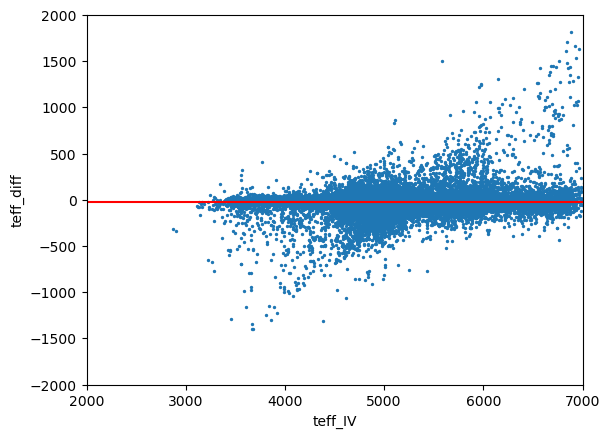

In [41]:
comb2.plot(x = "teff_IV", y = "teff_diff", kind = "scatter", ylim = [-2000, 2000], xlim = [2000, 7000], s = 2)
plt.axhline(y=comb2["teff_diff"].mean(), color='r', linestyle='-')

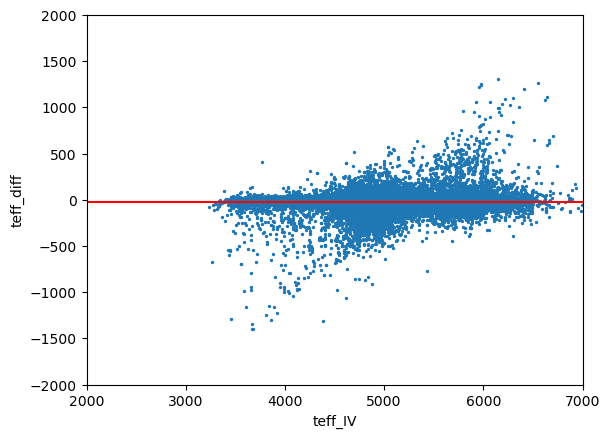

In [42]:
comb3.plot(x = "teff_IV", y = "teff_diff", kind = "scatter", ylim = [-2000, 2000], xlim = [2000, 7000], s = 2)
plt.axhline(y=comb3["teff_diff"].mean(), color='r', linestyle='-')

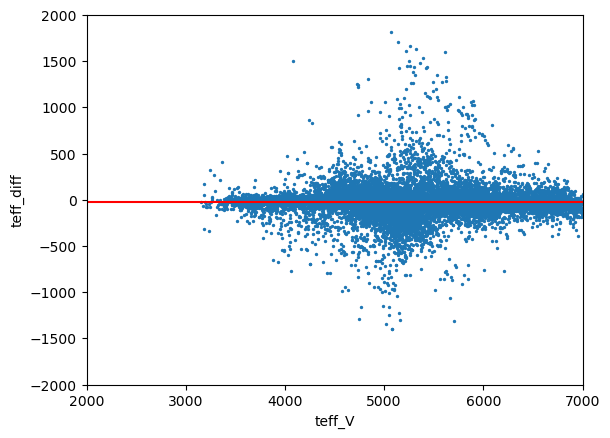

In [43]:
comb2.plot(x = "teff_V", y = "teff_diff", kind = "scatter", ylim = [-2000, 2000], xlim = [2000, 7000], s = 2)
plt.axhline(y=comb2["teff_diff"].mean(), color='r', linestyle='-')

<Axes: xlabel='teff_V', ylabel='teff_diff'>

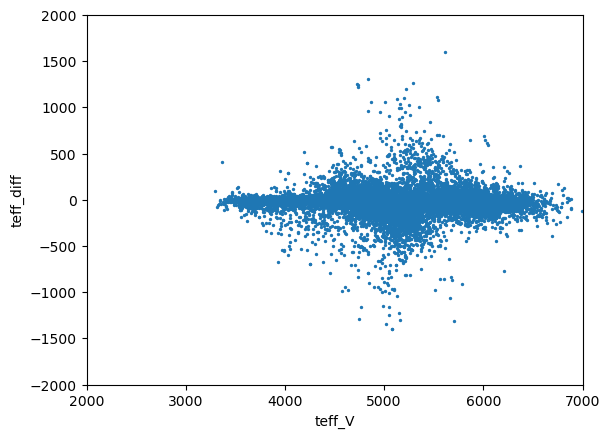

In [44]:
comb3.plot(x = "teff_V", y = "teff_diff", kind = "scatter", ylim = [-2000, 2000], xlim = [2000, 7000], s = 2)

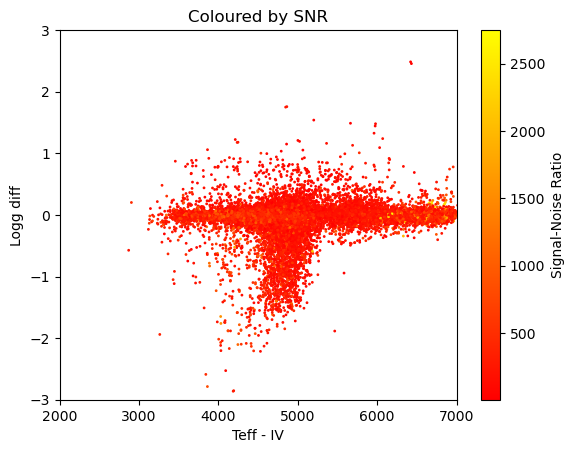

In [45]:
plt.scatter(x = comb2["teff_IV"], y = comb2["logg_diff"], c = comb2["SDSSIV SNR_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
plt.title("Coloured by SNR")
plt.xlabel("Teff - IV")
plt.ylabel("Logg diff")
  
plt.colorbar(label="Signal-Noise Ratio", orientation="vertical")

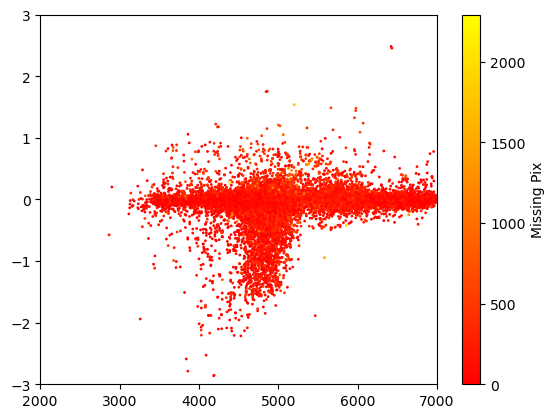

In [45]:
plt.scatter(x = comb2["teff_IV"], y = comb2["logg_diff"], c = comb2["SDSSIV nans_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
  
plt.colorbar(label="Missing Pix", orientation="vertical")

<Axes: xlabel='teff_IV', ylabel='logg_diff'>

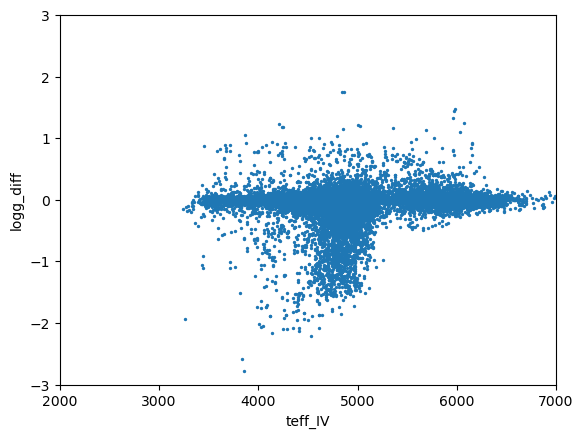

In [42]:
comb3.plot(x = "teff_IV", y = "logg_diff", kind = "scatter", ylim = [-3, 3], xlim = [2000, 7000], s = 2)

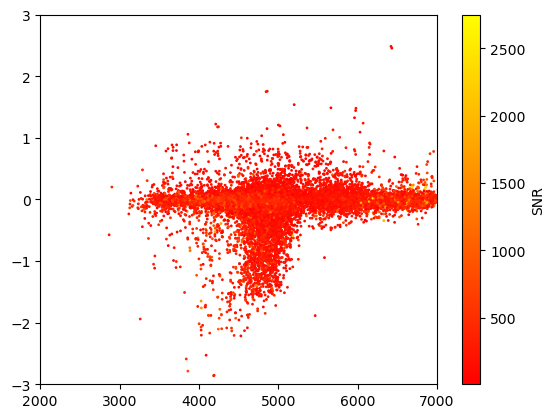

In [66]:
plt.scatter(x = comb2["teff_IV"], y = comb2["logg_diff"], c = comb2["SDSSIV SNR_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
  
plt.colorbar(label="SNR", orientation="vertical")

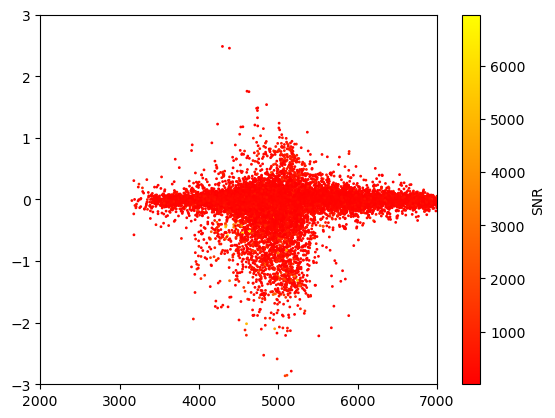

In [65]:
plt.scatter(x = comb2["teff_V"], y = comb2["logg_diff"], c = comb2["SDSSV SNR_V"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
  
plt.colorbar(label="SNR", orientation="vertical")

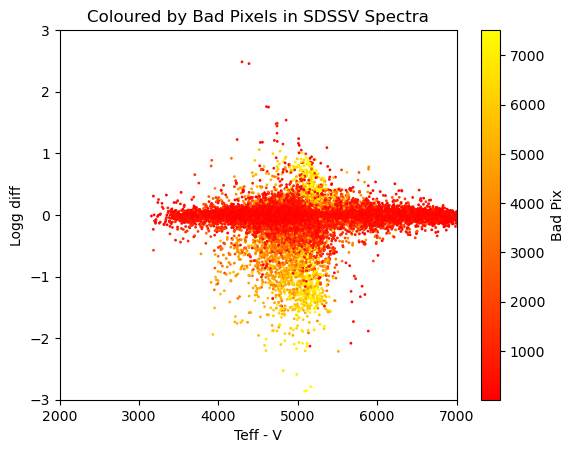

In [67]:
plt.scatter(x = comb2["teff_V"], y = comb2["logg_diff"], c = comb2["SDSSV nans_V"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
plt.title("Coloured by Bad Pixels in SDSSV Spectra")
plt.xlabel("Teff - V")
plt.ylabel("Logg diff")
  
plt.colorbar(label="Bad Pix", orientation="vertical")

<Axes: xlabel='teff_V', ylabel='logg_diff'>

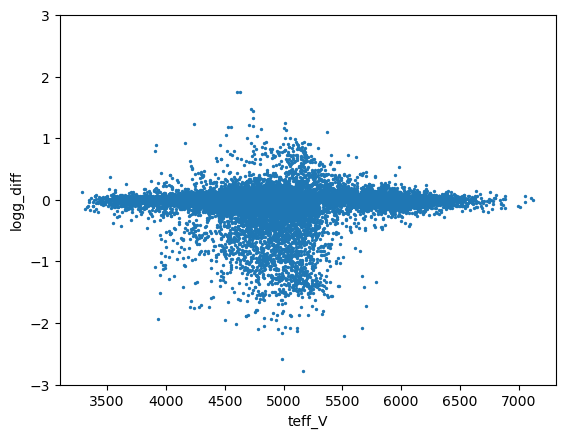

In [44]:
comb3.plot(x = "teff_V", y = "logg_diff", kind = "scatter", ylim = [-3, 3], s = 2)

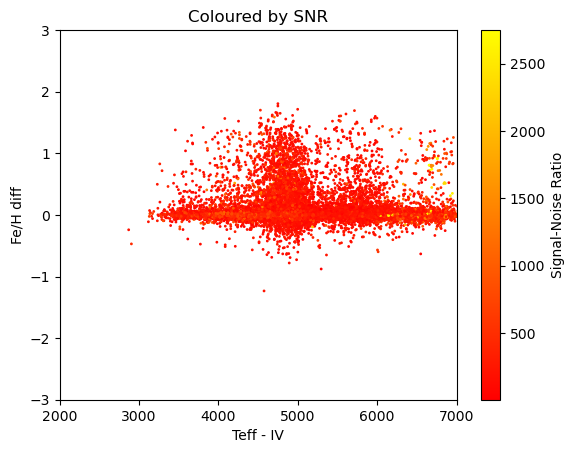

In [46]:
plt.scatter(x = comb2["teff_IV"], y = comb2["Fe_diff"], c = comb2["SDSSIV SNR_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
plt.title("Coloured by SNR")
plt.xlabel("Teff - IV")
plt.ylabel("Fe/H diff")
  
plt.colorbar(label="Signal-Noise Ratio", orientation="vertical")

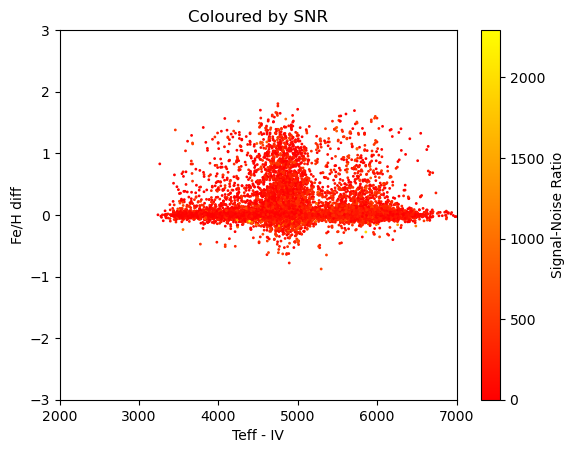

In [51]:
plt.scatter(x = comb3["teff_IV"], y = comb3["Fe_diff"], c = comb3["SDSSIV nans_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
plt.title("Coloured by SNR")
plt.xlabel("Teff - IV")
plt.ylabel("Fe/H diff")
  
plt.colorbar(label="Signal-Noise Ratio", orientation="vertical")

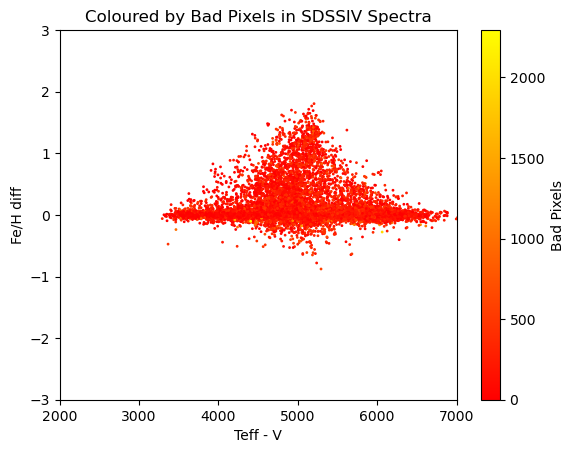

In [66]:
plt.scatter(x = comb3["teff_V"], y = comb3["Fe_diff"], c = comb3["SDSSIV nans_IV"], cmap = "autumn", s = 1)
plt.ylim(-3, 3)
plt.xlim(2000, 7000)
plt.title("Coloured by Bad Pixels in SDSSIV Spectra")
plt.xlabel("Teff - V")
plt.ylabel("Fe/H diff")
  
plt.colorbar(label="Bad Pixels", orientation="vertical")

<Axes: xlabel='teff_V', ylabel='Fe_diff'>

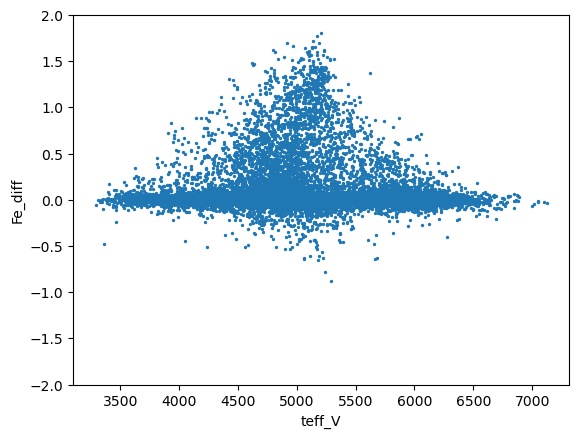

In [48]:
comb3.plot(x = "teff_V", y = "Fe_diff", kind = "scatter", ylim = [-2, 2], s = 2)

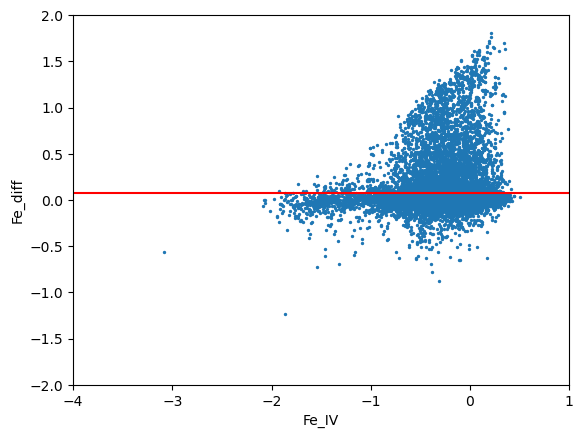

In [49]:
comb2.plot(x = "Fe_IV", y = "Fe_diff", kind = "scatter", ylim = [-2, 2], xlim = [-4, 1], s = 2)
plt.axhline(y=comb2["Fe_diff"].mean(), color='r', linestyle='-')

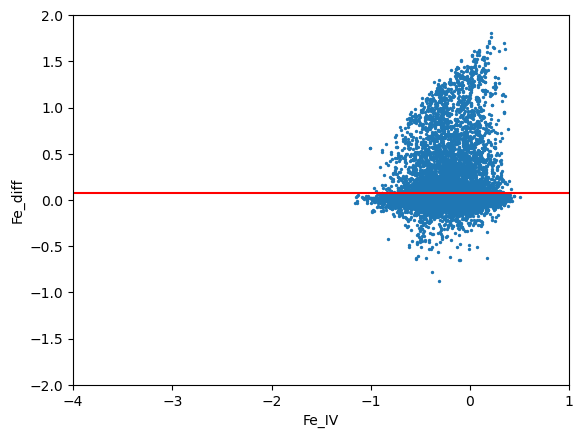

In [50]:
comb3.plot(x = "Fe_IV", y = "Fe_diff", kind = "scatter", ylim = [-2, 2], xlim = [-4, 1], s = 2)
plt.axhline(y=comb3["Fe_diff"].mean(), color='r', linestyle='-')

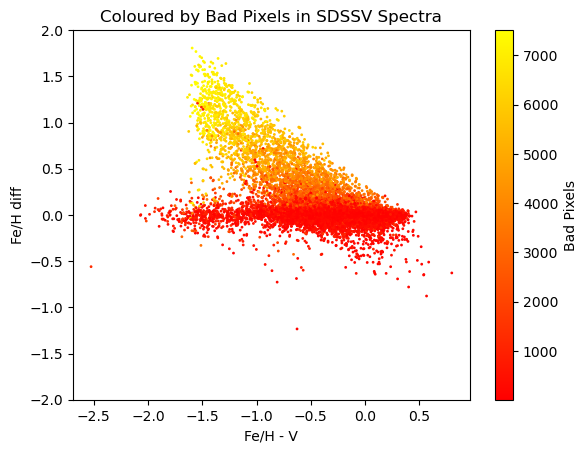

In [61]:
plt.scatter(x = comb2["Fe_V"], y = comb2["Fe_diff"], c = comb2["SDSSV nans_V"], cmap = "autumn", s = 1)
plt.ylim(-2, 2)
# plt.xlim(2000, 7000)
plt.title("Coloured by Bad Pixels in SDSSV Spectra")
plt.xlabel("Fe/H - V")
plt.ylabel("Fe/H diff")
  
plt.colorbar(label="Bad Pixels", orientation="vertical")

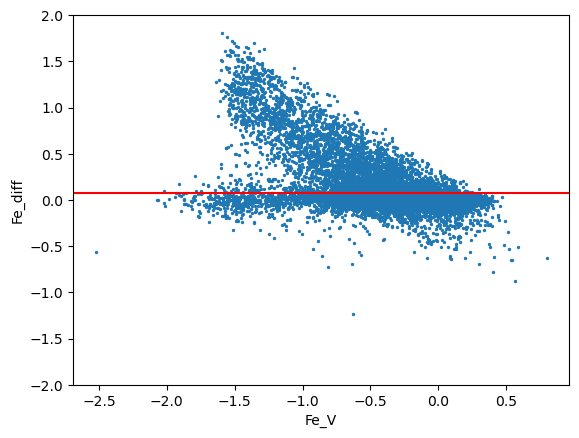

In [51]:
comb2.plot(x = "Fe_V", y = "Fe_diff", kind = "scatter", ylim = [-2, 2], s = 2)
plt.axhline(y=comb2["Fe_diff"].mean(), color='r', linestyle='-')

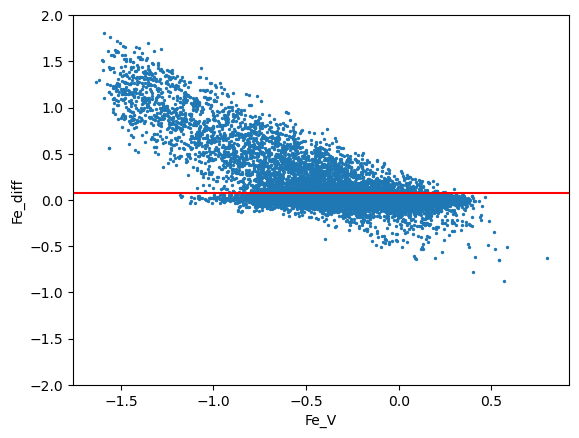

In [52]:
comb3.plot(x = "Fe_V", y = "Fe_diff", kind = "scatter", ylim = [-2, 2], s = 2)
plt.axhline(y=comb3["Fe_diff"].mean(), color='r', linestyle='-')

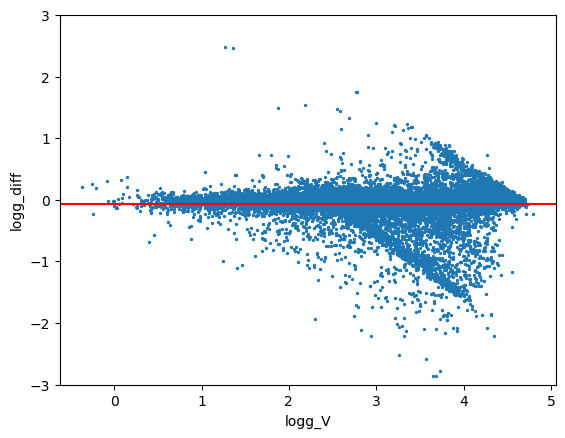

In [53]:
comb2.plot(x = "logg_V", y = "logg_diff", kind = "scatter", ylim = [-3, 3], s = 2)
plt.axhline(y=comb2["logg_diff"].mean(), color='r', linestyle='-')

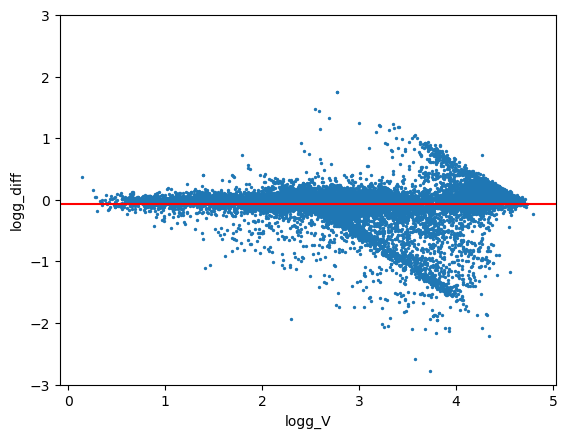

In [54]:
comb3.plot(x = "logg_V", y = "logg_diff", kind = "scatter", ylim = [-3, 3], s = 2)
plt.axhline(y=comb3["logg_diff"].mean(), color='r', linestyle='-')

In [55]:
comb2.plot(x = "logg_IV", y = "logg_diff", kind = "scatter", ylim = [-3, 3], xlim = [-1 , 6], s = 2)
plt.axhline(y=comb2["logg_diff"].mean(), color='r', linestyle='-')

In [56]:
comb3.plot(x = "logg_IV", y = "logg_diff", kind = "scatter", ylim = [-3, 3], xlim = [-1 , 6], s = 2)
plt.axhline(y=comb3["logg_diff"].mean(), color='r', linestyle='-')

In [57]:
comb2.plot(x = "Fe_IV", y = "logg_diff", kind = "scatter", ylim = [-5, 5], xlim = [-4, 1], s = 2)

<Axes: xlabel='Fe_IV', ylabel='logg_diff'>

<Axes: xlabel='Fe_V', ylabel='logg_diff'>

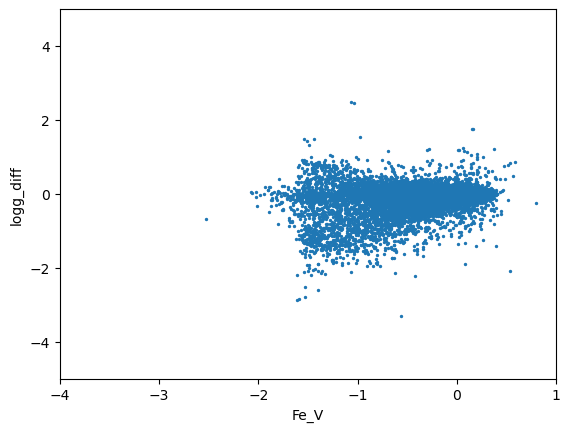

In [58]:
comb2.plot(x = "Fe_V", y = "logg_diff", kind = "scatter", ylim = [-5, 5], xlim = [-4, 1], s = 2)

In [59]:
afilt = a[a["logg_err"] < 0.2]
cfilt = c[c["logg_err"] < 0.2]
rfilt = r[r["logg_err"] < 0.2]

In [60]:
print(afilt.shape, cfilt.shape, rfilt.shape)

(23106, 45) (18781, 45) (26003, 59)


In [61]:
rfilt

teff      logg       Fe         C        CI         N  \
0       6276.733398  4.114545 -0.14979 -0.132203 -0.116684 -0.041340   
2       6120.736328  4.185034 -0.16747 -0.172771 -0.163914  0.054030   
3       6120.736328  4.185034 -0.16747 -0.172771 -0.163914  0.054030   
4       6785.443359  3.994033 -0.74362 -0.700940 -0.783729 -0.707768   
5       9793.469727  4.297631      NaN       NaN       NaN       NaN   
...             ...       ...      ...       ...       ...       ...   
26709  18237.105469  4.386278      NaN       NaN       NaN       NaN   
26710  17569.156250  3.723001      NaN       NaN       NaN       NaN   
26711   4837.166504  2.480554 -0.19687 -0.294440 -0.297500  0.029860   
26712  10211.349609  3.853112      NaN       NaN       NaN       NaN   
26713  19544.001953  4.225697      NaN       NaN       NaN       NaN   

              O        Na        Mg        Al        Si   P         S  \
0     -0.069146 -1.080736 -0.181841 -0.018789 -0.059931 NaN -0.139156   
2     -0.061550 -0.512796 -0.174320 -0.087874 -0.077950 NaN -0.185398   
3     -0.061550 -0.512796 -0.174320 -0.087874 -0.077950 NaN -0.185398   
4     -0.838583 -2.420537 -1.154732 -1.278574 -0.799345 NaN -0.552217   
5           NaN       NaN       NaN       NaN       NaN NaN       NaN   
...         ...       ...       ...       ...       ...  ..       ...   
26709       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26710       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26711 -0.069686 -0.255348 -0.085870 -0.066458 -0.144886 NaN -0.037848   
26712       NaN       NaN       NaN       NaN       NaN NaN       NaN   
26713       NaN       NaN       NaN       NaN       NaN NaN       NaN   

              K        Ca        Ti      TiII         V        Cr        Mn  \
0     -0.099577 -0.139741 -0.034361 -0.723598 -0.190449 -0.458212 -0.225917   
2     -0.316047 -0.175121 -0.490611 -0.447808 -0.274349 -0.165603 -0.177157   
3     -0.316047 -0.175121 -0.490611 -0.447808 -0.274349 -0.165603 -0.177157   
4     -2.376777 -0.088574 -0.896029 -0.968398 -1.367169 -0.380142 -0.356357   
5           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
26709       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26710       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26711 -0.043801 -0.166667 -0.178145 -0.047011 -0.097588 -0.228896 -0.222788   
26712       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26713       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             Co        Ni  Cu  Ge  Rb        Ce  Nd  Yb  C13    teff_err  \
0      0.146126 -0.205100 NaN NaN NaN  0.129093 NaN NaN  NaN   43.893612   
2      0.532814 -0.153630 NaN NaN NaN -0.462517 NaN NaN  NaN   39.149849   
3      0.532814 -0.153630 NaN NaN NaN -0.462517 NaN NaN  NaN   39.149849   
4      0.828894 -0.914560 NaN NaN NaN -1.834407 NaN NaN  NaN   95.535721   
5           NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  221.141388   
...         ...       ...  ..  ..  ..       ...  ..  ..  ...         ...   
26709       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  220.483566   
26710       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  303.751190   
26711 -0.106050 -0.173827 NaN NaN NaN -0.172170 NaN NaN  NaN    8.806530   
26712       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  221.141388   
26713       NaN       NaN NaN NaN NaN       NaN NaN NaN  NaN  267.811493   

       logg_err    Fe_err     C_err    CI_err     N_err     O_err    Na_err  \
0      0.024850  0.005641  0.060814  0.037035  0.261368  0.139877  0.209176   
2      0.024590  0.005881  0.053179  0.036028  0.102301  0.110897  0.191815   
3      0.024590  0.005881  0.053179  0.036028  0.102301  0.110897  0.191815   
4      0.046800  0.011568  0.202383  0.071076  4.453027  0.542881  0.774812   
5      0.063028 

# Error differences

In [62]:
pd.options.mode.use_inf_as_na = True

In [63]:
aerr.count()

teff    26149
logg    26150
C       26150
CI      26149
N       26149
O       26149
Na      26149
Mg      26149
Al      26149
Si      26149
P       26149
S       26149
K       26149
Ca      26149
Ti      26149
TiII    26149
V       26149
Cr      26149
Mn      26149
Fe      26149
Co      26149
Ni      26149
dtype: int64

In [64]:
aerr.iloc[aerr.index[np.isinf(aerr).any(1)]]

/tmp/ipykernel_8980/2251924697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  aerr.iloc[aerr.index[np.isinf(aerr).any(1)]]


teff       logg          C  CI   N   O  Na  Mg  Al  Si   P   S   K  Ca  \
3565   NaN  30.443774  55.472245 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

      Ti  TiII   V  Cr  Mn  Fe  Co  Ni  
3565 NaN   NaN NaN NaN NaN NaN NaN NaN

In [65]:
aerr.idxmax()

teff    21168
logg     3565
C        3565
CI         28
N       21518
O        7007
Na      25397
Mg       7007
Al      21518
Si       7007
P        7007
S       21518
K       21112
Ca       7007
Ti      19786
TiII     7005
V       21168
Cr      25028
Mn      21518
Fe      21518
Co       3475
Ni      21518
dtype: int64

In [66]:
aerr = aerr.fillna(9999)

In [67]:
bad_df = aerr.index.isin([3568])
aerr[~bad_df].describe()

teff          logg             C            CI             N  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean      82.538587      0.123147      0.055379      0.464432      0.525010   
std      109.080005      0.220140      0.352116     61.833934     61.834056   
min       13.827037      0.017941      0.010245      0.019155      0.012551   
25%       30.717892      0.064334      0.021612      0.033192      0.027839   
50%       51.638668      0.092310      0.028503      0.041042      0.048074   
75%       91.013760      0.134852      0.042623      0.057730      0.104231   
max     9999.000000     30.443774     55.472245   9999.000000   9999.000000   

                  O            Na            Mg            Al            Si  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.459354      0.705679      0.443709      0.478150      0.443280   
std       61.833891     61.834816     61.833919     61.833800     61.833923   
min        0.013884      0.037656      0.014376      0.020365      0.013002   
25%        0.028042      0.073656      0.025456      0.036205      0.024311   
50%        0.041293      0.119178      0.035389      0.053256      0.035336   
75%        0.062325      0.293204      0.052960      0.082296      0.053136   
max     9999.000000   9999.000000   9999.000000   9999.000000   9999.000000   

                  P             S             K            Ca            Ti  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.462151      0.454950      1.041670      0.464725      0.569596   
std       61.833801     61.833865     99.665319     61.833889     61.834358   
min        0.032194      0.015044      0.028644      0.016394      0.021632   
25%        0.047742      0.027758      0.048689      0.029098      0.039997   
50%        0.055125      0.040470      0.062331      0.040556      0.059600   
75%        0.071632      0.072425      0.092680      0.063736      0.139935   
max     9999.000000   9999.000000  12564.415518   9999.000000   9999.000000   

               TiII             V            Cr            Mn            Fe  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.517770      0.510890      0.555992      0.474771      0.440526   
std       61.833510     61.833526     61.834118     61.833806     61.833920   
min        0.030526      0.029186      0.023037      0.020959      0.013540   
25%        0.061947      0.082095      0.043791      0.038894      0.025937   
50%        0.101031      0.099345      0.063961      0.052833      0.035272   
75%        0.161592      0.126586      0.125906      0.077485      0.053341   
max     9999.000000   9999.000000   9999.000000   9999.000000   9999.000000   

                 Co            Ni  
count  26149.000000  26149.000000  
mean       0.667944      0.450843  
std       61.834741     61.833899  
min        0.016006      0.014826  
25%        0.039432      0.027716  
50%        0.087719      0.037759  
75%        0.301188      0.055967  
max     9999.000000   9999.000000

In [68]:
cerr[~bad_df].describe()

teff          logg             C            CI             N  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean     125.823983      0.191993      0.077983      0.133847      0.197280   
std      121.888299      0.177612      0.096144      0.550089      0.411272   
min       15.476437      0.019201      0.012237      0.019421      0.013879   
25%       43.795801      0.087864      0.028994      0.042326      0.042174   
50%       80.475533      0.130646      0.040691      0.057612      0.075440   
75%      148.203995      0.219602      0.073059      0.106748      0.178486   
max     1455.290885      4.689551      1.714017     78.463849     38.707516   

                  O            Na            Mg            Al            Si  \
count  2.614900e+04  2.614900e+04  26149.000000  26149.000000  26149.000000   
mean   6.185898e+03  3.159824e+02      0.089179      0.140610      0.089633   
std    6.925148e+05  5.101511e+04      0.105283      0.159309      0.101380   
min    1.554634e-02  3.884394e-02      0.015693      0.022361      0.015412   
25%    3.927056e-02  9.924338e-02      0.034018      0.051761      0.035378   
50%    5.813691e-02  1.929883e-01      0.047958      0.077187      0.051392   
75%    1.061460e-01  5.162623e-01      0.086956      0.146946      0.089444   
max    9.654609e+07  8.249476e+06      1.934660      2.500692      1.870469   

                  P             S             K            Ca            Ti  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.109333      0.109815      0.194651      0.118080      0.835517   
std        0.097447      0.129652      2.700333      0.156855     47.370431   
min        0.034796      0.016631      0.029440      0.018554      0.023224   
25%        0.056254      0.036435      0.061395      0.040844      0.055957   
50%        0.070417      0.059273      0.082624      0.060741      0.090974   
75%        0.109795      0.118828      0.150746      0.112150      0.228787   
max        2.017846      2.314580    419.073223      1.976591   5478.643071   

               TiII             V            Cr            Mn            Fe  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.185807      0.162162      0.228010      0.125833      0.086659   
std        0.156676      0.115886      0.362606      0.144445      0.091650   
min        0.034274      0.028170      0.023681      0.024989      0.015825   
25%        0.084826      0.096974      0.059391      0.051997      0.034742   
50%        0.135614      0.119693      0.095110      0.071545      0.049335   
75%        0.217107      0.173750      0.218237      0.123733      0.089901   
max        2.758714      1.914970      7.222708      1.918069      1.695326   

                 Co            Ni  
count  26149.000000  26149.000000  
mean       0.409894      0.094871  
std        0.950013      0.113795  
min        0.017579      0.017255  
25%        0.056237      0.037281  
50%        0.197450      0.052078  
75%        0.473507      0.091130  
max      100.608245      1.840868

In [69]:
err_diff = aerr[~bad_df] - cerr[~bad_df]

err_diff.describe()

teff          logg             C            CI             N  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean     -43.285395     -0.068847     -0.022603      0.330585      0.327730   
std      108.129654      0.243305      0.347502     61.834964     61.833675   
min     -830.769831     -4.244101     -1.420847    -78.424319    -38.607753   
25%      -38.358552     -0.063981     -0.023688     -0.036388     -0.045204   
50%      -12.583119     -0.021931     -0.008191     -0.010958     -0.014108   
75%       -3.339240     -0.004038     -0.001552     -0.002016     -0.002900   
max     9674.823966     30.179910     55.348963   9998.703170   9998.740980   

                  O            Na            Mg            Al            Si  \
count  2.614900e+04  2.614900e+04  26149.000000  26149.000000  26149.000000   
mean  -6.185438e+03 -3.152767e+02      0.354530      0.337540      0.353647   
std    6.925148e+05  5.101515e+04     61.833328     61.832814     61.833490   
min   -9.654609e+07 -8.249476e+06     -1.539669     -1.851613     -1.484165   
25%   -2.967885e-02 -1.847722e-01     -0.022920     -0.041204     -0.026817   
50%   -9.966783e-03 -2.769330e-02     -0.007666     -0.013891     -0.009983   
75%   -1.936581e-03  2.195592e-03     -0.001603     -0.003469     -0.003037   
max    9.998787e+03  9.998023e+03   9998.818642   9998.712595   9998.844899   

                  P             S             K            Ca            Ti  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.352818      0.345135      0.847018      0.346646     -0.265921   
std       61.833337     61.832686     97.662195     61.833573     77.895942   
min       -1.610246     -1.973487   -114.483683     -1.366067  -5478.598316   
25%       -0.028248     -0.031021     -0.044998     -0.034907     -0.052881   
50%       -0.009990     -0.009475     -0.012199     -0.011947     -0.015815   
75%       -0.001522     -0.001061      0.000538     -0.003494     -0.003261   
max     9998.817991   9998.697235  12145.342295   9998.848214   9998.770276   

               TiII             V            Cr            Mn            Fe  \
count  26149.000000  26149.000000  26149.000000  26149.000000  26149.000000   
mean       0.331962      0.348728      0.327983      0.348938      0.353866   
std       61.832329     61.833043     61.832676     61.833485     61.833526   
min       -2.163686     -0.788087     -5.900933     -1.338599     -1.338980   
25%       -0.051980     -0.036337     -0.053069     -0.032090     -0.022933   
50%       -0.019291     -0.013845     -0.015047     -0.011879     -0.007991   
75%       -0.000057     -0.001018     -0.002235     -0.003174     -0.002216   
max     9998.621762   9998.765835   9998.654418   9998.836890   9998.850512   

                 Co            Ni  
count  26149.000000  26149.000000  
mean       0.258050      0.355972  
std       61.837001     61.833608  
min     -100.268961     -1.393892  
25%       -0.165632     -0.024265  
50%       -0.020859     -0.008766  
75%        0.001988     -0.002425  
max     9998.453948   9998.866807

generally the DR17 data has lower errors than the SDSS-V data 

# Teff/Log(g)

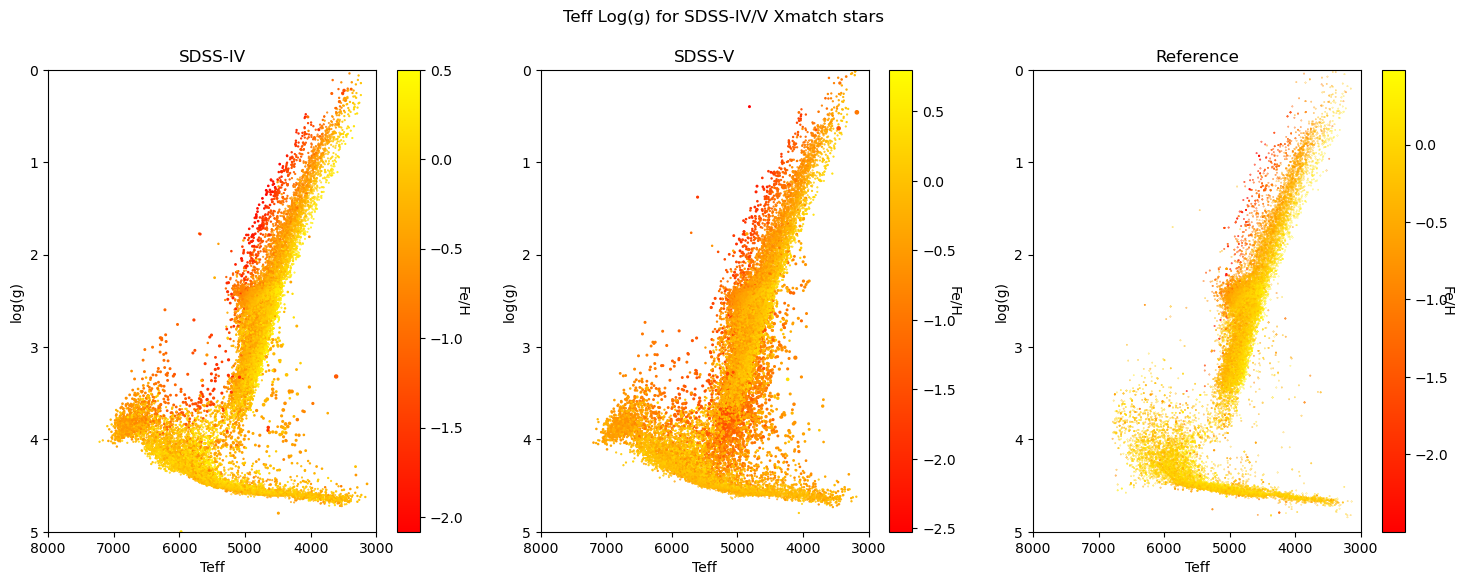

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Teff Log(g) for SDSS-IV/V Xmatch stars")
fig.set_size_inches(18, 6)
af = a[a["teff"] > 0]
af = af[af["Fe"] > -3]

map1 = ax1.scatter(af["teff"], af["logg"], s = af["logg_err"]*2, c = af["Fe"], cmap = "autumn")
ax1.set_title("SDSS-IV")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 0])

map2 = ax2.scatter(c["teff"], c["logg"], s = c["logg_err"]*2, c = c["Fe"], cmap = "autumn")
ax2.set_title("SDSS-V")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 0])

map3 = ax3.scatter(r["teff"], r["logg"], s = r["logg_err"]*2, c = r["Fe"], cmap = "autumn")
ax3.set_title("Reference")
ax3.set_xlabel("Teff")
ax3.set_ylabel("log(g)")
ax3.set_xlim([8000, 3000])
ax3.set_ylim([5, 0])

fig.colorbar(map1).set_label("Fe/H", rotation=270)
fig.colorbar(map2).set_label("Fe/H", rotation=270)
fig.colorbar(map3).set_label("Fe/H", rotation=270)
fig.show()

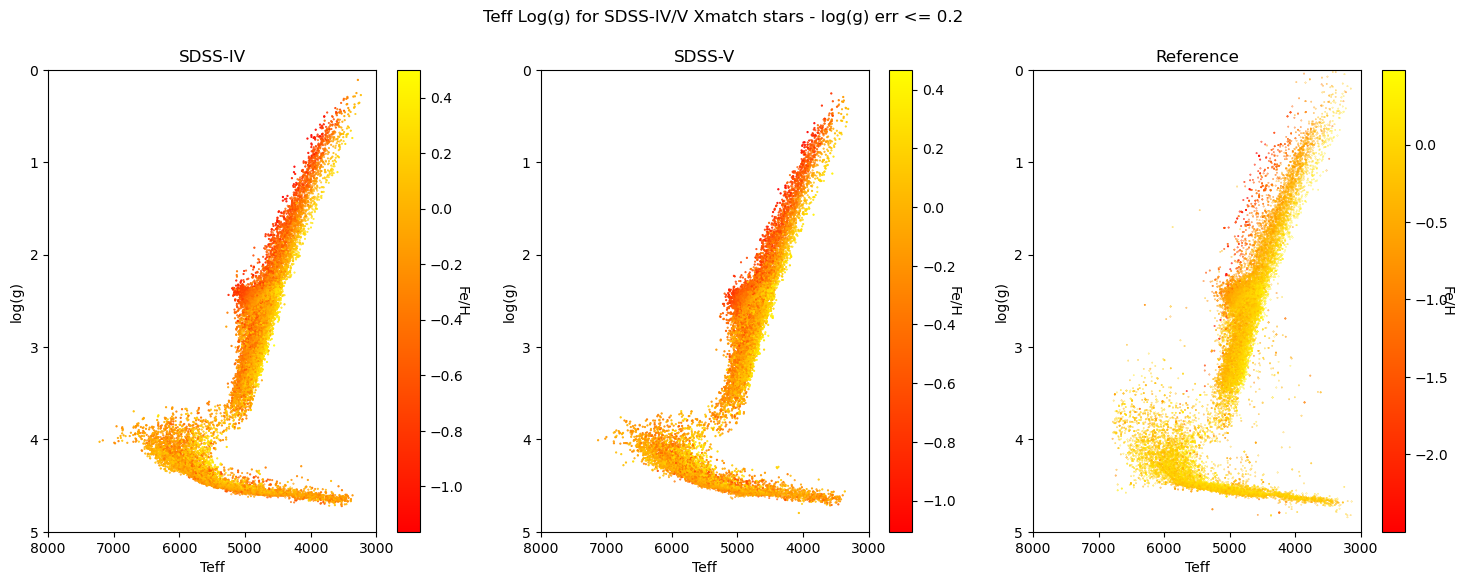

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Teff Log(g) for SDSS-IV/V Xmatch stars - log(g) err <= 0.2")
fig.set_size_inches(18, 6)

map1 = ax1.scatter(afilt["teff"], afilt["logg"], s = afilt["logg_err"]*2, c = afilt["Fe"], cmap = "autumn")
ax1.set_title("SDSS-IV")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 0])

map2 = ax2.scatter(cfilt["teff"], cfilt["logg"], s = cfilt["logg_err"]*2, c = cfilt["Fe"], cmap = "autumn")
ax2.set_title("SDSS-V")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 0])

map3 = ax3.scatter(rfilt["teff"], rfilt["logg"], s = rfilt["logg_err"]*2, c = rfilt["Fe"], cmap = "autumn")
ax3.set_title("Reference")
ax3.set_xlabel("Teff")
ax3.set_ylabel("log(g)")
ax3.set_xlim([8000, 3000])
ax3.set_ylim([5, 0])

fig.colorbar(map1).set_label("Fe/H", rotation=270)
fig.colorbar(map2).set_label("Fe/H", rotation=270)
fig.colorbar(map3).set_label("Fe/H", rotation=270)
fig.show()

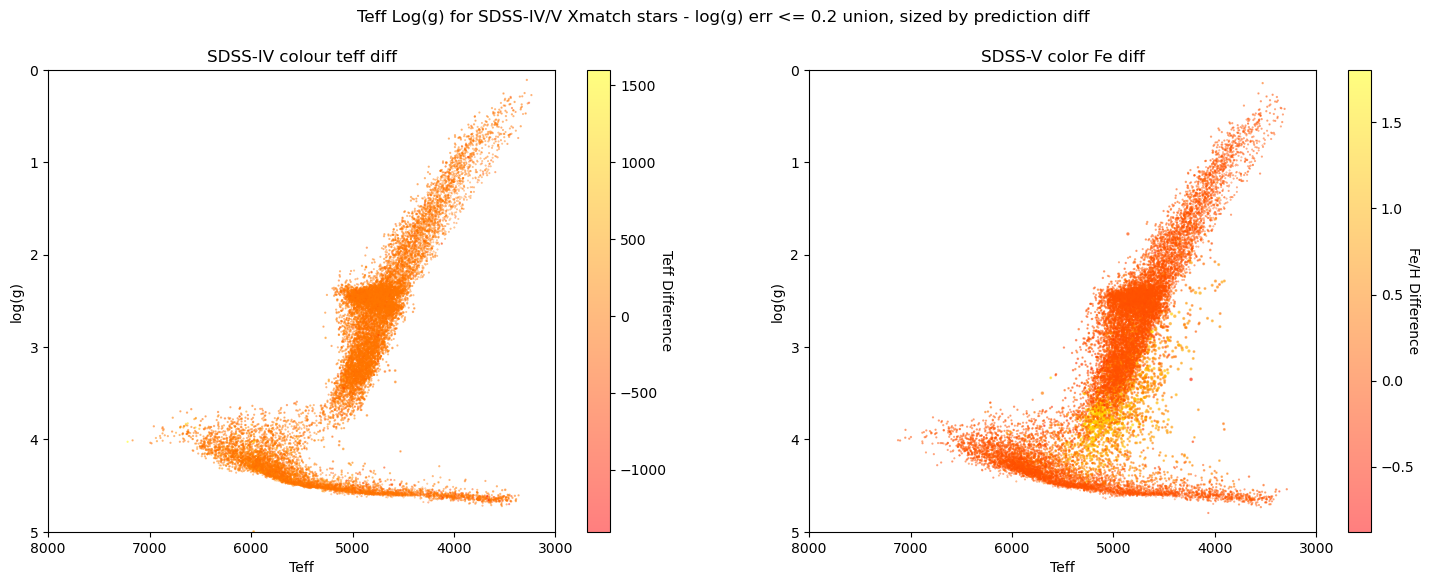

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Teff Log(g) for SDSS-IV/V Xmatch stars - log(g) err <= 0.2 union, sized by prediction diff")
fig.set_size_inches(18, 6)

map1 = ax1.scatter(comb3["teff_IV"], comb3["logg_IV"], s = comb3["logg_err_IV"]*2, c = comb3["teff_diff"], alpha = 0.5, cmap = "autumn")
ax1.set_title("SDSS-IV colour teff diff")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 0])

map2 = ax2.scatter(comb3["teff_V"], comb3["logg_V"], s = comb3["logg_err_V"]*2, c = comb3["Fe_diff"], alpha = 0.5, cmap = "autumn")
ax2.set_title("SDSS-V color Fe diff")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 0])

fig.colorbar(map1).set_label("Teff Difference", rotation=270)
fig.colorbar(map2).set_label("Fe/H Difference", rotation=270)
fig.show()

# Mg/Fe

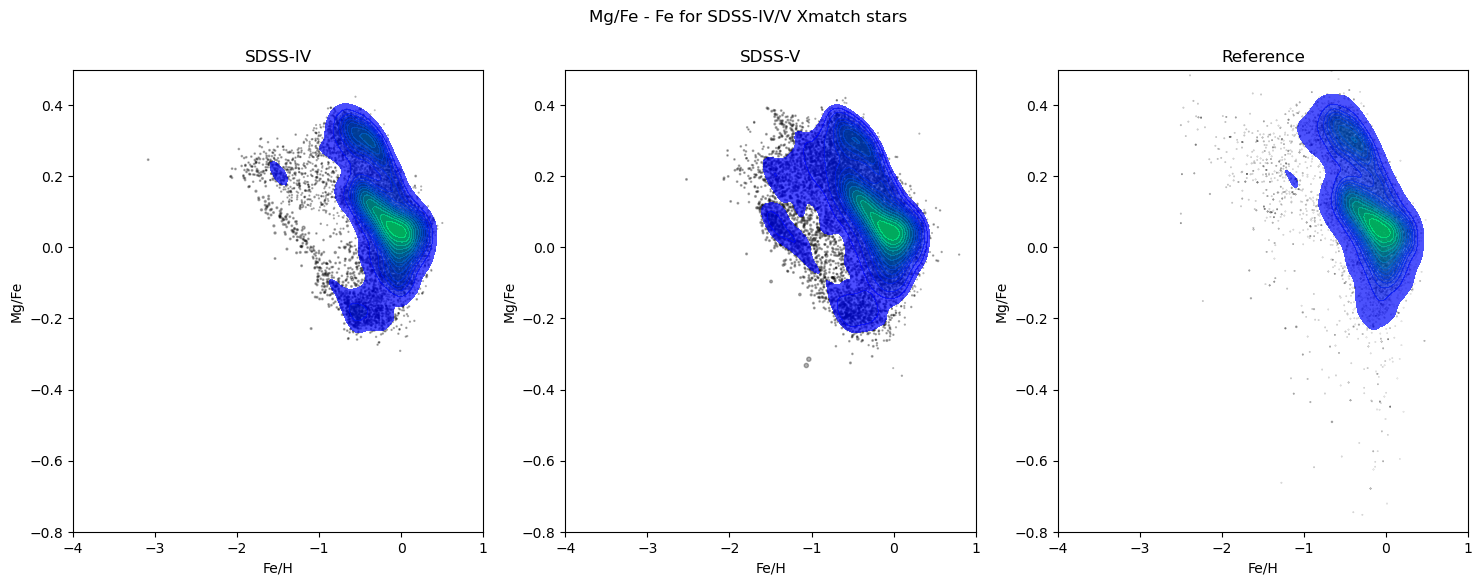

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Mg/Fe - Fe for SDSS-IV/V Xmatch stars")
fig.set_size_inches(18, 6)

x1, y1 = a["Fe"], a["Mg/Fe"]
x2, y2 = c["Fe"], c["Mg/Fe"]
x3, y3 = r["Fe"], r["Mg/Fe"]
 

ax1.scatter(x1, y1, s = a["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x1, y=y1, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax1)
ax1.set_title("SDSS-IV")
ax1.set_xlabel("Fe/H")
ax1.set_ylabel("Mg/Fe")
ax1.set_xlim([-4, 1])
ax1.set_ylim([-0.8, 0.5])


ax2.scatter(x2, y2, s = c["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x2, y=y2, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax2)
ax2.set_title("SDSS-V")
ax2.set_xlabel("Fe/H")
ax2.set_ylabel("Mg/Fe")
ax2.set_xlim([-4, 1])
ax2.set_ylim([-0.8, 0.5])

ax3.scatter(x3, y3, s = r["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x3, y=y3, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax3)
ax3.set_title("Reference")
ax3.set_xlabel("Fe/H")
ax3.set_ylabel("Mg/Fe")
ax3.set_xlim([-4, 1])
ax3.set_ylim([-0.8, 0.5])

fig.show()

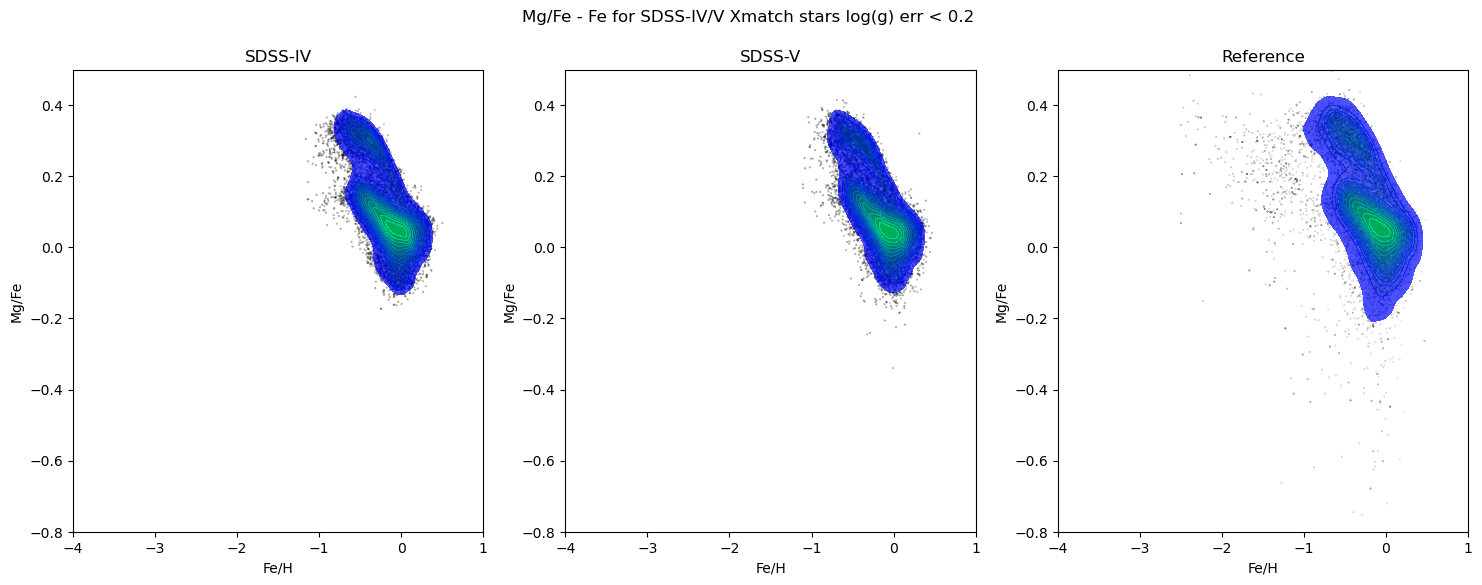

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Mg/Fe - Fe for SDSS-IV/V Xmatch stars log(g) err < 0.2")
fig.set_size_inches(18, 6)

x1, y1 = afilt["Fe"], afilt["Mg/Fe"]
x2, y2 = cfilt["Fe"], cfilt["Mg/Fe"]
x3, y3 = rfilt["Fe"], rfilt["Mg/Fe"]
 

ax1.scatter(x1, y1, s = afilt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x1, y=y1, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax1)
ax1.set_title("SDSS-IV")
ax1.set_xlabel("Fe/H")
ax1.set_ylabel("Mg/Fe")
ax1.set_xlim([-4, 1])
ax1.set_ylim([-0.8, 0.5])


ax2.scatter(x2, y2, s = cfilt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x2, y=y2, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax2)
ax2.set_title("SDSS-V")
ax2.set_xlabel("Fe/H")
ax2.set_ylabel("Mg/Fe")
ax2.set_xlim([-4, 1])
ax2.set_ylim([-0.8, 0.5])

ax3.scatter(x3, y3, s = rfilt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x3, y=y3, cmap="winter", levels = 15, fill=True, alpha = 0.7, ax = ax3)
ax3.set_title("Reference")
ax3.set_xlabel("Fe/H")
ax3.set_ylabel("Mg/Fe")
ax3.set_xlim([-4, 1])
ax3.set_ylim([-0.8, 0.5])

fig.show()